In [1]:
import dgl
import torch as th
import numpy as np
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm

Using backend: pytorch


In [75]:
# Node file
gse = pd.read_csv('../data/GSE_full_pkd.csv', sep=',')

# Edge file
ppi = pd.read_csv('../data/PPI_net.txt', sep=' ')

In [3]:
gse.head(5)

,Unnamed: 0,5'nucleotidase increased,AGEP,AIDS dementia complex,AION,AML progression,ANA increased,Abasia,Abdominal abscess,Abdominal adhesions,...,Xerophthalmia,Xerosis,Yawning,Yeast infection,Yellow nail syndrome,Yellow skin,Zinc deficiency,Zollinger-Ellison syndrome,pH urine decreased,pH urine increased
0,9606.ENSP00000000233,0.0,6.725073,7.024553,7.453834,0.000000,0.000000,5.718798,0.000000,0.0,...,68.786461,12.542385,127.915960,0.0,0.0,12.006820,0.0,0.0,0.0,0.000000
1,9606.ENSP00000000412,0.0,12.470183,7.132782,18.775259,5.096781,5.313812,5.799043,5.371833,0.0,...,80.642611,23.518950,199.942375,0.0,0.0,23.110771,0.0,0.0,0.0,5.098909
2,9606.ENSP00000001008,0.0,12.307338,7.090710,18.387997,5.037927,5.211054,5.708994,5.271610,0.0,...,98.489266,23.155396,201.049668,0.0,0.0,22.761878,0.0,0.0,0.0,5.057459
3,9606.ENSP00000001146,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,8.856247,0.000000,24.220131,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,9606.ENSP00000002125,0.0,0.000000,0.000000,7.692634,0.000000,0.000000,0.000000,0.000000,0.0,...,24.874148,0.000000,48.194148,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [4]:
ppi = ppi[['protein1', 'protein2', 'neighborhood']]
ppi['neighborhood'] = 1
ppi.head(5)

,protein1,protein2,neighborhood
0,9606.ENSP00000000233,9606.ENSP00000272298,1
1,9606.ENSP00000000233,9606.ENSP00000253401,1
2,9606.ENSP00000000233,9606.ENSP00000401445,1
3,9606.ENSP00000000233,9606.ENSP00000418915,1
4,9606.ENSP00000000233,9606.ENSP00000327801,1


In [82]:
#Nodes need to be numerical and ordered corectly, so we make a id dic
genes = gse['Unnamed: 0'].tolist()
gene_ids = {}
for i, gene in enumerate(genes):
    gene_ids[gene] = i+1
gene_ids  

{'9606.ENSP00000000233': 1,
 '9606.ENSP00000000412': 2,
 '9606.ENSP00000001008': 3,
 '9606.ENSP00000001146': 4,
 '9606.ENSP00000002125': 5,
 '9606.ENSP00000002165': 6,
 '9606.ENSP00000002596': 7,
 '9606.ENSP00000002829': 8,
 '9606.ENSP00000003084': 9,
 '9606.ENSP00000003100': 10,
 '9606.ENSP00000003302': 11,
 '9606.ENSP00000004531': 12,
 '9606.ENSP00000005178': 13,
 '9606.ENSP00000005226': 14,
 '9606.ENSP00000005257': 15,
 '9606.ENSP00000005260': 16,
 '9606.ENSP00000005284': 17,
 '9606.ENSP00000005286': 18,
 '9606.ENSP00000005340': 19,
 '9606.ENSP00000005386': 20,
 '9606.ENSP00000005587': 21,
 '9606.ENSP00000005995': 22,
 '9606.ENSP00000006015': 23,
 '9606.ENSP00000006053': 24,
 '9606.ENSP00000006275': 25,
 '9606.ENSP00000006526': 26,
 '9606.ENSP00000006658': 27,
 '9606.ENSP00000006724': 28,
 '9606.ENSP00000006777': 29,
 '9606.ENSP00000007390': 30,
 '9606.ENSP00000007414': 31,
 '9606.ENSP00000007699': 32,
 '9606.ENSP00000007722': 33,
 '9606.ENSP00000007735': 34,
 '9606.ENSP00000008391'

In [7]:
#There are 11 genes that are in GSE, so we remove them.
drop_list =[] 

for gene in ppi['protein1'].unique().tolist():
    if gene not in gene_ids:
        drop_list.append(gene)
    else: pass
    
for gene in ppi['protein2'].unique().tolist():
    if gene not in gene_ids and gene not in drop_list:
        drop_list.append(gene)
    else: pass
    
drop_list

for gene in drop_list: 
    ppi.drop(ppi.loc[ppi['protein1'] == gene].index, inplace=True)
    ppi.drop(ppi.loc[ppi['protein2'] == gene].index, inplace=True)


In [8]:
drop_list

['9606.ENSP00000222330',
 '9606.ENSP00000241041',
 '9606.ENSP00000324464',
 '9606.ENSP00000346484',
 '9606.ENSP00000349458',
 '9606.ENSP00000369126',
 '9606.ENSP00000380044',
 '9606.ENSP00000384262',
 '9606.ENSP00000421689',
 '9606.ENSP00000435460',
 '9606.ENSP00000470087']

In [9]:
#converting to gene ids
#%%time
def gene2id (gene):
    return(gene_ids[gene])

gse['Unnamed: 0'] = gse.apply(lambda x: gene2id(x['Unnamed: 0']), axis=1)
ppi['protein1'] = ppi.apply(lambda x: gene2id(x['protein1']), axis=1)
ppi['protein2'] = ppi.apply(lambda x: gene2id(x['protein2']), axis=1)

In [10]:
ppi.to_csv('../data/GNN-PPI-net.csv', index=False, sep = ',')
ppi

,protein1,protein2,neighborhood
0,1,3469,1
1,1,1759,1
2,1,15624,1
3,1,16446,1
4,1,7409,1
...,...,...,...
11759449,19555,6049,1
11759450,19555,8711,1
11759451,19555,9472,1
11759452,19555,12490,1


In [11]:
PSE = pd.read_csv('../data/TWOSIDE-train-PSE-964.csv', sep = ',')
PSE

,Drug1,Drug2,PSE
0,Temazepam,sildenafil,Arthralgia
1,Bumetanide,Oxytocin,Arthralgia
2,Tamoxifen,Prednisone,Diarrhoea
3,Temazepam,sildenafil,Diarrhoea
4,Bumetanide,Oxytocin,Diarrhoea
...,...,...,...
18492593,Ketoprofen,montelukast,Pulmonary embolism
18492594,Ketoprofen,montelukast,Cough
18492595,Ketoprofen,montelukast,Rash
18492596,Ketoprofen,montelukast,Alopecia


In [12]:
PSEs = PSE['PSE'].unique().tolist()
PSEs = ['Unnamed: 0'] + PSEs
PSEs

['Unnamed: 0',
 'Arthralgia',
 'Diarrhoea',
 'Headache',
 'Vomiting',
 'Dyspepsia',
 'Renal impairment',
 'Cough',
 'Rhinorrhoea',
 'Malaise',
 'Back pain',
 'Fluid retention',
 'Oedema peripheral',
 'Oedema',
 'Death',
 'Cerebrovascular accident',
 'Pain',
 'Wound',
 'Fatigue',
 'Gastrooesophageal reflux disease',
 'Sinusitis',
 'Urinary tract infection',
 'Fall',
 'Bone pain',
 'Nausea',
 'Paraesthesia',
 'General physical health deterioration',
 'Abdominal pain',
 'Anxiety',
 'Emotional distress',
 'Injury',
 'Memory impairment',
 'Rash',
 'Alanine aminotransferase increased',
 'Drug eruption',
 'Chest pain',
 'Dyspnoea',
 'Stress',
 'Asthenia',
 'Depression',
 'Dysgeusia',
 'Weight decreased',
 'Pruritus',
 'Feeling abnormal',
 'Muscle spasms',
 'Nightmare',
 'Convulsion',
 'Hyperhidrosis',
 'Urinary retention',
 'Dizziness',
 'Haemoglobin decreased',
 'White blood cell count decreased',
 'Burning sensation',
 'Flushing',
 'Anhedonia',
 'Gastrointestinal haemorrhage',
 'Depressed m

In [13]:
gse[PSEs].to_csv('../data/GNN-GSE_full_pkd.csv', index=False, sep = ',')
gse[PSEs]

,Unnamed: 0,Arthralgia,Diarrhoea,Headache,Vomiting,Dyspepsia,Renal impairment,Cough,Rhinorrhoea,Malaise,...,Hyperventilation,Pleuritic pain,Nail disorder,Aneurysm,Thrombophlebitis,Hypertensive crisis,Pneumonia bacterial,Hepatocellular injury,Shock haemorrhagic,Haemorrhagic stroke
0,1,1435.311474,2188.937071,2499.321092,2312.106667,1386.644430,356.284702,1174.944377,310.639288,1084.879668,...,223.630871,58.239659,173.643861,20.867455,417.227247,86.881479,11.557043,159.488805,0.000000,50.131207
1,2,2097.678625,3469.919959,3942.120674,3739.098323,2166.102151,598.497136,1792.400738,450.065121,1732.131649,...,357.130567,84.966805,299.834820,31.816050,698.467021,130.788080,17.369556,290.119394,0.000000,66.647387
2,3,2169.295754,3590.788212,4079.078193,3869.892186,2235.652521,618.186508,1847.730402,461.310440,1795.426913,...,370.564360,88.271348,314.431532,31.401490,720.579870,133.591341,17.107904,314.949263,4.900596,70.222325
3,4,131.475935,214.448113,272.905665,238.337711,139.492185,23.672694,173.859116,56.985875,130.850475,...,40.935875,0.000000,24.565521,7.856576,65.308120,7.856576,0.000000,7.821060,0.000000,7.821060
4,5,300.003438,472.430492,555.908618,535.897454,332.465184,71.658370,305.196001,89.677354,245.429943,...,65.823370,7.773126,57.448701,8.148609,99.051288,23.995306,0.000000,24.170209,0.000000,31.948546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19550,19551,1002.150453,1448.841850,1703.825703,1558.113483,978.236699,257.906524,846.163221,224.892148,697.356179,...,133.170510,34.904913,142.228214,20.721509,248.871392,56.899097,0.000000,87.995135,0.000000,49.639241
19551,19552,26.726783,44.415508,62.073964,44.425961,18.047588,0.000000,44.318659,8.668741,17.699179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19552,19553,44.099734,79.031392,96.983502,79.016809,35.346855,0.000000,61.703207,8.767463,34.955981,...,8.688242,0.000000,16.964596,0.000000,25.652838,0.000000,0.000000,0.000000,0.000000,0.000000
19553,19554,3102.454655,5135.359395,5871.016637,5670.388742,3200.975464,882.941648,2693.372110,651.813588,2578.409495,...,481.710675,122.345326,409.303916,60.257496,1073.531794,177.268953,25.170222,438.237176,4.888619,95.994955


### Making drugs specific graphs

In [10]:
# Node file
nodes = pd.read_csv('../data/GNN-GSE_full_pkd_norm.csv', sep=',')

# Edge file
edges = pd.read_csv('../data/GNN-PPI-net.csv', sep=',')

# Drug-protein file (DTI)
dti = pd.read_csv('../data/GNN-DTI_full.csv', sep=',')

# DrugIds
DrugID = pd.read_csv('../data/DrugID.csv', sep = ',')

In [3]:
# featurs need normalization
'''
cols = nodes.columns.values.tolist()[1:] # exclude ProteinID
for PSE in tqdm(cols):
    nodes[PSE] = nodes[PSE]/nodes[PSE].max() #Norm by PSE dist.
'''
nodes

,ProteinID,Arthralgia,Diarrhoea,Headache,Vomiting,Dyspepsia,Renal impairment,Cough,Rhinorrhoea,Malaise,...,Hyperventilation,Pleuritic pain,Nail disorder,Aneurysm,Thrombophlebitis,Hypertensive crisis,Pneumonia bacterial,Hepatocellular injury,Shock haemorrhagic,Haemorrhagic stroke
0,1,0.358786,0.331214,0.331587,0.317190,0.335361,0.312375,0.338038,0.366366,0.324478,...,0.369491,0.367760,0.331027,0.258567,0.298505,0.376681,0.326366,0.283259,0.000000,0.406277
1,2,0.524359,0.525044,0.523004,0.512955,0.523873,0.524737,0.515684,0.530804,0.518065,...,0.590064,0.536531,0.571592,0.394230,0.499718,0.567042,0.490509,0.515264,0.000000,0.540129
2,3,0.542261,0.543332,0.541174,0.530898,0.540694,0.542000,0.531602,0.544067,0.536996,...,0.612260,0.557398,0.599418,0.389093,0.515539,0.579196,0.483120,0.559363,0.741488,0.569101
3,4,0.032865,0.032449,0.036207,0.032697,0.033736,0.020755,0.050020,0.067209,0.039136,...,0.067636,0.000000,0.046831,0.097350,0.046725,0.034063,0.000000,0.013891,0.000000,0.063384
4,5,0.074992,0.071485,0.073753,0.073518,0.080407,0.062827,0.087807,0.105765,0.073406,...,0.108756,0.049084,0.109518,0.100969,0.070866,0.104034,0.000000,0.042927,0.000000,0.258920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19550,19551,0.250509,0.219228,0.226048,0.213752,0.236587,0.226122,0.243446,0.265237,0.208573,...,0.220029,0.220411,0.271138,0.256758,0.178055,0.246690,0.000000,0.156283,0.000000,0.402290
19551,19552,0.006681,0.006721,0.008235,0.006095,0.004365,0.000000,0.012751,0.010224,0.005294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19552,19553,0.011024,0.011958,0.012867,0.010840,0.008549,0.000000,0.017752,0.010340,0.010455,...,0.014355,0.000000,0.032341,0.000000,0.018353,0.000000,0.000000,0.000000,0.000000,0.000000
19553,19554,0.775524,0.777046,0.778912,0.777902,0.774158,0.774126,0.774898,0.768745,0.771179,...,0.795900,0.772562,0.780279,0.746645,0.768059,0.768563,0.710797,0.778327,0.739676,0.777970


In [119]:
edges

,protein1,protein2,neighborhood
0,1,3469,1
1,1,1759,1
2,1,15624,1
3,1,16446,1
4,1,7409,1
...,...,...,...
11738325,19555,6049,1
11738326,19555,8711,1
11738327,19555,9472,1
11738328,19555,12490,1


In [7]:
dti

,DrugID,ProteinID
0,85,32
1,85,90
2,85,100
3,85,119
4,85,153
...,...,...
8914333,71306834,19532
8914334,71306834,19535
8914335,71306834,19539
8914336,71306834,19544


### Creating a Dataset for Graph Classification from CSV

#### 1. graph_edges.csv

containing three columns:
- graph_id: the ID of the graph.
- src: the source node of an edge of the given graph.
- dst: the destination node of an edge of the given graph.


In [33]:
# generate drug specific ppi subgraph for GNN edges
def drug2ppi(drug):
    genes = dti['ProteinID'].loc[dti['DrugID'] == drug].tolist()
    dic = {gene:genes.index(gene)+1 for gene in genes}
    df = edges[['protein1','protein2']].loc[edges['protein1'].isin(genes)]
    df = df.loc[df['protein2'].isin(genes)]
    df['graph_id'] = DrugID.loc[DrugID['DrugID'] == drug]['GraphID'].tolist()[0]  #DrugID
    df = df.rename(columns={'protein1': 'src_prot', 'protein2': 'dst_prot'}) # prot: actual protein id
    df['src'] = df['src_prot'].map(dic) #local
    df['dst'] = df['dst_prot'].map(dic)
    return(df[['graph_id', 'src', 'dst', 'src_prot', 'dst_prot']])

In [ ]:
#Edges of the garphs, graph_edges.csv
GNN_edges = pd.DataFrame(columns=['graph_id', 'src', 'dst', 'src_prot', 'dst_prot'])

for drug in tqdm(dti['DrugID'].unique().tolist()):
    GNN_edges = pd.concat([GNN_edges, drug2ppi(drug)], ignore_index=True)
    #drug2ppi(drug).to_csv('../data/GNN_edges/'+str(drug)+'.csv', index=False, sep = ',')
    
GNN_edges.to_csv('../data/GNN_edges.csv', index=False, sep = ',')
GNN_edges

#### 2.graph_properties.csv: containing three columns:

- graph_id: the ID of the graph.
-label: the label of the graph.
-num_nodes: the number of nodes in the grap

In [95]:
# counts how many nodes a drug2ppi has
def drug2num_nodes(drug):
    genes = dti['ProteinID'].loc[dti['DrugID'] == drug].tolist()
    return(len(genes))

In [135]:
#labes of the garphs, graph_properties.csv
rows = []
for i,drug in enumerate(dti['DrugID'].unique().tolist()):
    row = {'graph_id': i+1,
           'label': drug, #drugID
           'num_nodes': drug2num_nodes(drug)}
    rows.append(row)
    
GNN_properties = pd.DataFrame.from_dict(rows)   
GNN_properties.to_csv('../data/GNN_properties.csv', index=False, sep = ',')
GNN_properties

,graph_id,label,num_nodes
0,1,85,825
1,2,119,824
2,3,137,1030
3,4,143,5736
4,5,146,5454
5,6,158,2677
6,7,159,10575
7,8,160,7009
8,9,175,1246
9,10,187,6916


### Visualization

Wall time: 15 s


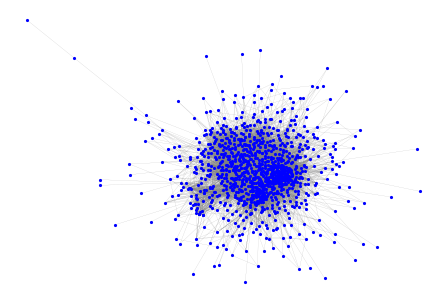

In [130]:
%%time
x = drug2ppi(175).reset_index(drop=True)   
G = nx.from_pandas_edgelist(x, 'src', 'dst')
#print(list(nx.isolates(G)))

options = { "node_color": "blue",
            "edge_color": "gray",
            "node_size": 10,
            "linewidths": 0,
            "width": 0.1 }
#nx.draw(G, with_labels=True, **options)
nx.draw(G, **options)

## Appendix

In [ ]:

g = dgl.graph(([0, 0, 1, 5], [1, 2, 2, 0])) # 6 nodes, 4 edges
g
g.ndata['x'] = th.ones(g.num_nodes(), 3)               # node feature of length 3
g.edata['x'] = th.ones(g.num_edges(), dtype=th.int32)  # scalar integer feature
g
# different names can have different shapes
g.ndata['y'] = th.randn(g.num_nodes(), 5)
g.ndata['x'][1]                  # get node 1's feature
g.edata['x'][th.tensor([0, 3])]  # get features of edge 0 and 3


In [77]:
# DrugIDs, Names and GraphIDs
drugs = pd.read_csv('../data/drug_names.tsv', sep='\t')
temp = []
for i in range(len(drugs)):
    row = {'GraphID': i+1,
           'DrugID': drugs['DrugID'][i][4:],
           'Name': drugs['name'][i]}
    temp.append(row)
    
DrugID = pd.DataFrame.from_dict(temp)
DrugID['DrugID'] = pd.to_numeric(DrugID['DrugID'])
DrugID.to_csv('../data/DrugID.csv', index=False, sep = ',')
DrugID

,GraphID,DrugID,Name
0,1,85,carnitine
1,2,119,gamma-aminobutyric
2,3,137,5-aminolevulinic
3,4,143,leucovorin
4,5,146,5-methyltetrahydrofolate
...,...,...,...
1425,1426,56603655,pegaptanib
1426,1427,56842239,n-3
1427,1428,70683024,x
1428,1429,70695640,colestyramine


In [78]:
# GeneIDs and names
gse = pd.read_csv('../data/GSE_full_pkd.csv', sep=',')
genes = gse['Unnamed: 0'].tolist()
temp = []
for i in range(len(genes)):
    row = {'Name': genes[i],
           'GeneID': i+1}
    temp.append(row)
    
GeneID = pd.DataFrame.from_dict(temp)
GeneID.to_csv('../data/GeneID.csv', index=False, sep = ',')
GeneID 

,Name,GeneID
0,9606.ENSP00000000233,1
1,9606.ENSP00000000412,2
2,9606.ENSP00000001008,3
3,9606.ENSP00000001146,4
4,9606.ENSP00000002125,5
...,...,...
19550,9606.ENSP00000485671,19551
19551,9606.ENSP00000485672,19552
19552,9606.ENSP00000485673,19553
19553,9606.ENSP00000485675,19554
